In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import joblib
import seaborn as sns
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
from keras.models import save_model
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix

In [26]:
X=[]
y=[]
base_path='dataset3/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            print(file_path)
            data=pd.read_csv(file_path,header=None)
            print(data.shape)
            data=data.to_numpy()
            X.append(data)
            y.append(child)   

dataset3/0/4-56.csv
(36, 63)
dataset3/0/1+47.csv
(23, 63)
dataset3/0/1ar (3rd copy).csv
(28, 63)
dataset3/0/1-13.csv
(28, 63)
dataset3/0/1-65.csv
(30, 63)
dataset3/0/1-23.csv
(36, 63)
dataset3/0/4al (another copy).csv
(36, 63)
dataset3/0/4-51.csv
(36, 63)
dataset3/0/3-9.csv
(28, 63)
dataset3/0/1+37.csv
(41, 63)
dataset3/0/1-38.csv
(41, 63)
dataset3/0/1-12.csv
(28, 63)
dataset3/0/1+26.csv
(26, 63)
dataset3/0/1+11.csv
(28, 63)
dataset3/0/3-3.csv
(35, 63)
dataset3/0/4-76.csv
(35, 63)
dataset3/0/1ar.csv
(28, 63)
dataset3/0/4-4.csv
(35, 63)
dataset3/0/1-3.csv
(35, 63)
dataset3/0/2-2.csv
(35, 63)
dataset3/0/1-4.csv
(35, 63)
dataset3/0/1+1.csv
(35, 63)
dataset3/0/3-10.csv
(28, 63)
dataset3/0/3-94.csv
(26, 63)
dataset3/0/1+17.csv
(36, 63)
dataset3/0/3-41.csv
(23, 63)
dataset3/0/1al (6th copy).csv
(35, 63)
dataset3/0/3-7.csv
(35, 63)
dataset3/0/2-36.csv
(41, 63)
dataset3/0/1ar (5th copy).csv
(28, 63)
dataset3/0/1+40.csv
(41, 63)
dataset3/0/4-97.csv
(26, 63)
dataset3/0/2al (6th copy).csv
(36, 63

(30, 63)
dataset3/0/4-64.csv
(24, 63)
dataset3/0/2-8.csv
(35, 63)
dataset3/0/ex1 (3rd copy).csv
(26, 63)
dataset3/0/4-38.csv
(41, 63)
dataset3/0/1+41.csv
(23, 63)
dataset3/0/2-66.csv
(30, 63)
dataset3/0/3-54.csv
(36, 63)
dataset3/0/1+35.csv
(41, 63)
dataset3/0/5al (5th copy).csv
(30, 63)
dataset3/0/2-4.csv
(35, 63)
dataset3/0/4-1.csv
(35, 63)
dataset3/0/1+6.csv
(35, 63)
dataset3/0/1+19.csv
(36, 63)
dataset3/0/4-79.csv
(35, 63)
dataset3/0/ex1 (another copy).csv
(26, 63)
dataset3/0/3-83.csv
(29, 63)
dataset3/0/3-51.csv
(36, 63)
dataset3/0/5al.csv
(30, 63)
dataset3/0/1-37.csv
(41, 63)
dataset3/0/3al (another copy).csv
(41, 63)
dataset3/0/1-5.csv
(35, 63)
dataset3/0/2-64.csv
(24, 63)
dataset3/0/ex1 (9th copy).csv
(26, 63)
dataset3/0/1-34.csv
(41, 63)
dataset3/0/4-73.csv
(26, 63)
dataset3/0/1-15.csv
(28, 63)
dataset3/0/3-98.csv
(26, 63)
dataset3/0/4-43.csv
(23, 63)
dataset3/0/3-71.csv
(25, 63)
dataset3/0/3-88.csv
(26, 63)
dataset3/0/2-15.csv
(28, 63)
dataset3/0/2-67.csv
(30, 63)
dataset3/0/

(36, 63)
dataset3/1/0011-23.csv
(37, 63)
dataset3/1/005-84.csv
(36, 63)
dataset3/1/0011-15.csv
(36, 63)
dataset3/1/005-12.csv
(36, 63)
dataset3/1/005-59.csv
(48, 63)
dataset3/1/0011-41.csv
(42, 63)
dataset3/1/0055+28.csv
(46, 63)
dataset3/1/005+7.csv
(34, 63)
dataset3/1/0011-77.csv
(34, 63)
dataset3/1/005-131.csv
(42, 63)
dataset3/1/005-196.csv
(38, 63)
dataset3/1/0055+53.csv
(37, 63)
dataset3/1/001+7.csv
(34, 63)
dataset3/1/001+1.csv
(42, 63)
dataset3/1/or-58.csv
(46, 63)
dataset3/1/005-38.csv
(46, 63)
dataset3/1/001-2.csv
(36, 63)
dataset3/1/0011-84.csv
(36, 63)
dataset3/1/005-83.csv
(37, 63)
dataset3/1/005+13.csv
(37, 63)
dataset3/1/005-215.csv
(36, 63)
dataset3/1/005-230.csv
(41, 63)
dataset3/1/0055+52.csv
(36, 63)
dataset3/1/005-106.csv
(38, 63)
dataset3/1/005-189.csv
(48, 63)
dataset3/1/005-48.csv
(46, 63)
dataset3/1/005-10.csv
(41, 63)
dataset3/1/0011-87.csv
(34, 63)
dataset3/1/11-3.csv
(37, 63)
dataset3/1/0011-22.csv
(36, 63)
dataset3/1/0011-7.csv
(34, 63)
dataset3/1/0011-98.cs

(34, 63)
dataset3/1/005+2.csv
(36, 63)
dataset3/1/005-87.csv
(34, 63)
dataset3/1/005-136.csv
(38, 63)
dataset3/1/0011-60.csv
(41, 63)
dataset3/1/0055+39.csv
(48, 63)
dataset3/1/005-211.csv
(42, 63)
dataset3/1/0055+26.csv
(38, 63)
dataset3/1/0055+21.csv
(42, 63)
dataset3/1/001-8.csv
(46, 63)
dataset3/1/0055+17.csv
(34, 63)
dataset3/1/005+25.csv
(36, 63)
dataset3/1/005-82.csv
(36, 63)
dataset3/1/or+51.csv
(42, 63)
dataset3/1/or-52.csv
(36, 63)
dataset3/1/001+10.csv
(41, 63)
dataset3/1/005-81.csv
(42, 63)
dataset3/1/005-218.csv
(46, 63)
dataset3/1/005-98.csv
(46, 63)
dataset3/1/005-35.csv
(36, 63)
dataset3/1/0055+31.csv
(42, 63)
dataset3/1/005-210.csv
(41, 63)
dataset3/1/005-8.csv
(46, 63)
dataset3/1/0011-63.csv
(37, 63)
dataset3/1/005-144.csv
(36, 63)
dataset3/1/0011-112.csv
(36, 63)
dataset3/1/0011-61.csv
(42, 63)
dataset3/1/005+6.csv
(38, 63)
dataset3/1/005+3.csv
(37, 63)
dataset3/1/001-4.csv
(36, 63)
dataset3/1/005+23.csv
(37, 63)
dataset3/1/005-111.csv
(42, 63)
dataset3/1/0011-26.csv

In [27]:
y = np.array(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
max_review_length = 50
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [30]:
X_train = X_train.reshape(-1, 50* 63)
X_test = X_test.reshape(-1, 50* 63)

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
joblib.dump(scaler, 'scalersvm.pkl')

['scalersvm.pkl']

In [33]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [34]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [35]:
svm_model = SVC()

In [36]:
history=svm_model.fit(X_train, y_train)

/home/sanju/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
y_pred = svm_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8157894736842105


In [39]:
cm = confusion_matrix(y_test,y_pred)

Confusion Matrix:
[[100  56]
 [  0 148]]


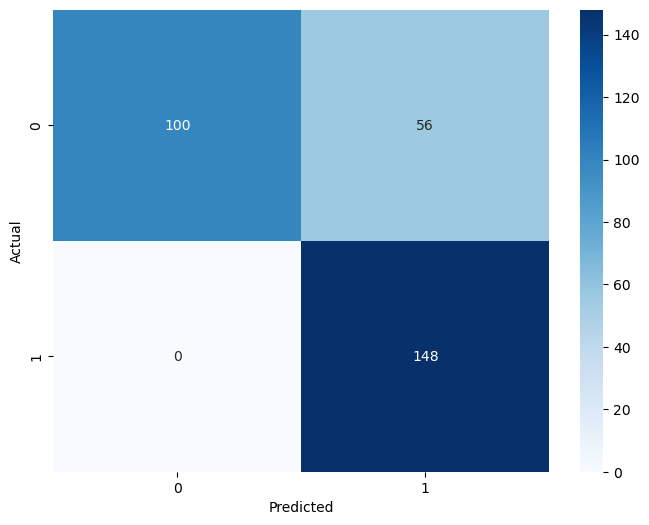

In [40]:
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [42]:
fpr1, tpr1, thresholds_keras = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive rate')

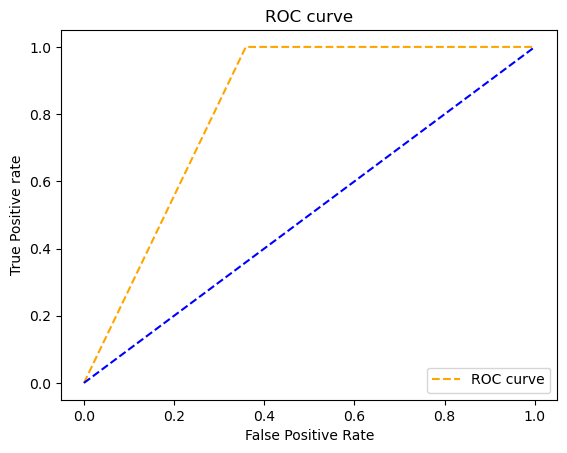

In [43]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='ROC curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')

In [44]:
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

0.8205128205128205


In [45]:
y_pred = svm_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

In [46]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.725


In [47]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 1.000


In [48]:
print(matthews_corrcoef(y_test, y_pred))

0.6819514777452971
